<a href="https://colab.research.google.com/github/Twenkid/Colab-Notebooks-AI-ML-CV/blob/main/Florence-2-Vsion-Text-Model-0-23B_0-77B_excellent-14-5-2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Florence-2-large sample usage

## Edits by Twenkid, 14.5.2025+

In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
import torch
%matplotlib inline

In [74]:
def load_model(model_id):
  model_id_2 = id #'microsoft/Florence-2-small'
  model_2 = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').eval().cuda()
  processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)
  return model_2, processor
model_2, processor_2 = load_model('microsoft/Florence-2-base')

config.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [75]:
def run_example_p(processor, task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to('cuda', torch.float16)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

In [80]:
us = ["http://twenkid.com/", "https://eim.twenkid.com/old/eim_sveti_3.jpg","https://twenkid.com/mind/hackafe3.png"]
#url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
url = us[0]
image = Image.open(requests.get(url, stream=True).raw)
task_prompt = '<CAPTION>'
a = run_example_p(processor, task_prompt); print(a)
task_prompt = '<DETAILED_CAPTION>'
a = run_example_p(processor, task_prompt); print(a)
task_prompt = '<MORE_DETAILED_CAPTION>'
a = run_example_p(processor, task_prompt); print(a)
task_prompt = '<OD>'
results = run_example_p(processor, task_prompt); print(a)
print(results)


{'<CAPTION>': 'a black background with a gold text that reads свешенният сметац'}
{'<DETAILED_CAPTION>': 'The image shows a black background with the words "Свеченият Сметация" written in white font, surrounded by a few sparkling stars. The stars are of various sizes and colors, creating a beautiful and eye-catching display. The text stands out against the dark background, making it the focal point of the image.'}
{'<MORE_DETAILED_CAPTION>': 'The image is a black background with a golden text in the center that reads "Свеченният Сметау" which translates to "Happy New Year" in English. The text is written in a fancy font and is surrounded by small white stars and sparkles. The stars are of different sizes and colors, including pink, blue, green, and gold. The sparkles are scattered around the text, creating a festive and celebratory atmosphere. The overall color scheme of the image is black, gold, and pink.'}
{'<MORE_DETAILED_CAPTION>': 'The image is a black background with a golden tex

# LARGE

In [3]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## define the prediction function

In [4]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to('cuda', torch.float16)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

## init image

In [5]:
us = ["https://twenkid.com/mind/hackafe3.png"]
#url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
url = us[0]
image = Image.open(requests.get(url, stream=True).raw)

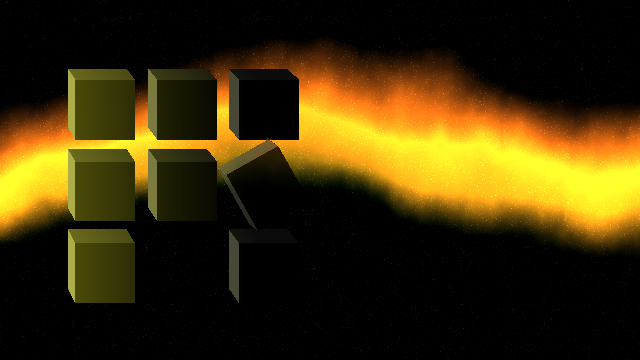

In [6]:
image

## Run pre-defined tasks without additional inputs

### Caption

In [7]:
task_prompt = '<CAPTION>'
run_example(task_prompt)

{'<CAPTION>': 'A black background with a bunch of cubes in the middle of it.'}

In [9]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt)

{'<DETAILED_CAPTION>': 'The image shows a black background with a yellow and orange flame emanating from a cube, creating an animated effect. The cube is composed of several other cubes, and the flame is a bright orange and yellow, giving the image a vibrant and dynamic feel.'}

In [10]:
task_prompt = '<MORE_DETAILED_CAPTION>'
run_example(task_prompt)

{'<MORE_DETAILED_CAPTION>': 'The image is a digital illustration of a group of six green cubes arranged in a grid-like pattern on a black background. The cubes are of different sizes and shapes, with the largest cube in the center and the smallest cubes on either side. The background is a gradient of orange and yellow, with a hint of yellow on the right side, creating a wave-like effect. The overall color scheme of the image is predominantly black and orange, with some hints of yellow and red. The image appears to be a 3D rendering, giving it a realistic and dynamic feel.'}

### Object detection

OD results format:
{'\<OD>':
    {
    'bboxes': [[x1, y1, x2, y2], ...],
    'labels': ['label1', 'label2', ...]
    }
}

In [11]:
task_prompt = '<OD>'
results = run_example(task_prompt)
print(results)

{'<OD>': {'bboxes': [[0.3199999928474426, 0.18000000715255737, 639.6799926757812, 359.46002197265625]], 'labels': ['poster']}}


In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

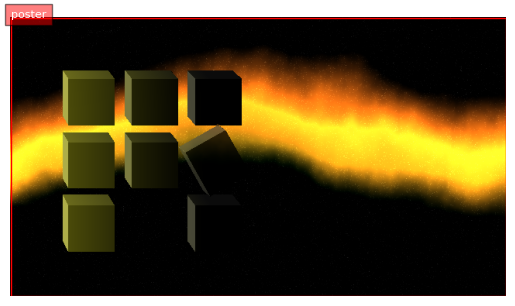

In [13]:
plot_bbox(image, results['<OD>'])

### Dense region caption

Dense region caption results format:
{'\<DENSE_REGION_CAPTION>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['label1', 'label2', ...]}}

In [14]:
task_prompt = '<DENSE_REGION_CAPTION>'
results = run_example(task_prompt)
print(results)

{'<DENSE_REGION_CAPTION>': {'bboxes': [], 'labels': []}}


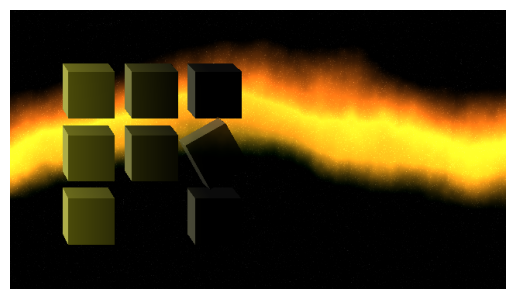

In [15]:
plot_bbox(image, results['<DENSE_REGION_CAPTION>'])

### Region proposal

Region proposal results format:
{'<REGION_PROPOSAL>' : {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [16]:
task_prompt = '<REGION_PROPOSAL>'
results = run_example(task_prompt)
print(results)

{'<REGION_PROPOSAL>': {'bboxes': [[0.3199999928474426, 0.18000000715255737, 639.6799926757812, 359.46002197265625]], 'labels': ['']}}


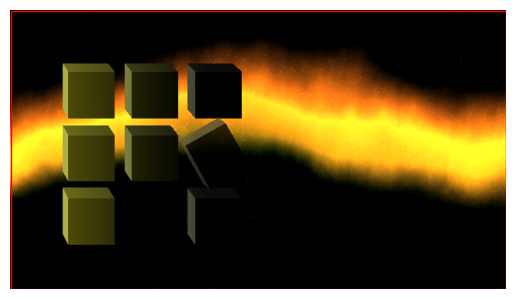

In [17]:
plot_bbox(image, results['<REGION_PROPOSAL>'])

## Run pre-defined tasks that requires additional inputs

### Phrase Grounding
Phrase grounding results format:
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [22]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
#results = run_example(task_prompt, text_input="A green car parked in front of a yellow building.")
results = run_example(task_prompt, text_input="A set of cubes.")
print(results)

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[63.68000030517578, 62.46000289916992, 303.67999267578125, 306.9000244140625], [227.51998901367188, 66.7800064086914, 300.47998046875, 141.3000030517578], [146.87998962402344, 66.7800064086914, 217.9199981689453, 140.94000244140625], [146.87998962402344, 147.42001342773438, 217.9199981689453, 222.66000366210938], [66.87999725341797, 227.3400115966797, 136.0, 304.3800048828125], [66.87999725341797, 147.42001342773438, 136.0, 222.3000030517578], [66.87999725341797, 67.13999938964844, 136.0, 140.94000244140625]], 'labels': ['cubes', 'cubes', 'cubes', 'cubes', 'cubes', 'cubes', 'cubes']}}


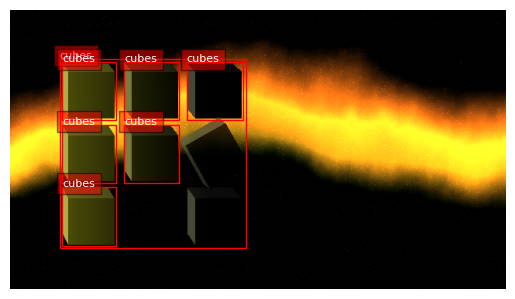

In [23]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### Referring expression segmentation

Referring expression segmentation results format:
{'\<REFERRING_EXPRESSION_SEGMENTATION>': {'Polygons': [[[polygon]], ...], 'labels': ['', '', ...]}}, one object is represented by a list of polygons. each polygon is [x1, y1, x2, y2, ..., xn, yn]

In [25]:
task_prompt = '<REFERRING_EXPRESSION_SEGMENTATION>'
#results = run_example(task_prompt, text_input="a green car")
results = run_example(task_prompt, text_input="a cube")
print(results)

{'<REFERRING_EXPRESSION_SEGMENTATION>': {'polygons': [[[68.15999603271484, 69.30000305175781, 127.04000091552734, 69.30000305175781, 134.0800018310547, 78.66000366210938, 134.0800018310547, 139.13999938964844, 74.55999755859375, 139.13999938964844, 74.55999755859375, 137.3400115966797, 73.91999816894531, 135.54000854492188, 72.63999938964844, 133.02000427246094, 68.79999542236328, 128.70001220703125, 68.15999603271484, 126.9000015258789]]], 'labels': ['']}}


In [26]:
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
def draw_polygons(image, prediction, fill_mask=False):
    """
    Draws segmentation masks with polygons on an image.

    Parameters:
    - image_path: Path to the image file.
    - prediction: Dictionary containing 'polygons' and 'labels' keys.
                  'polygons' is a list of lists, each containing vertices of a polygon.
                  'labels' is a list of labels corresponding to each polygon.
    - fill_mask: Boolean indicating whether to fill the polygons with color.
    """
    # Load the image

    draw = ImageDraw.Draw(image)


    # Set up scale factor if needed (use 1 if not scaling)
    scale = 1

    # Iterate over polygons and labels
    for polygons, label in zip(prediction['polygons'], prediction['labels']):
        color = random.choice(colormap)
        fill_color = random.choice(colormap) if fill_mask else None

        for _polygon in polygons:
            _polygon = np.array(_polygon).reshape(-1, 2)
            if len(_polygon) < 3:
                print('Invalid polygon:', _polygon)
                continue

            _polygon = (_polygon * scale).reshape(-1).tolist()

            # Draw the polygon
            if fill_mask:
                draw.polygon(_polygon, outline=color, fill=fill_color)
            else:
                draw.polygon(_polygon, outline=color)

            # Draw the label text
            draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill=color)

    # Save or display the image
    #image.show()  # Display the image
    display(image)

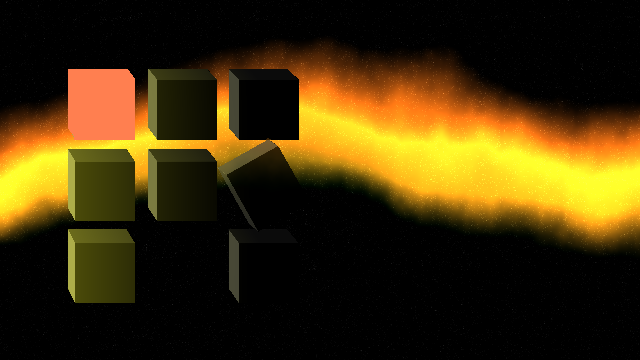

In [27]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REFERRING_EXPRESSION_SEGMENTATION>'], fill_mask=True)

### region to segmentation


with additional region as inputs, format is '\<loc_x1>\<loc_y1>\<loc_x2>\<loc_y2>', [x1, y1, x2, y2] is the quantized corrdinates in [0, 999].

In [30]:
task_prompt = '<REGION_TO_SEGMENTATION>'
#results = run_example(task_prompt, text_input="<loc_702><loc_575><loc_866><loc_772>")
results = run_example(task_prompt, text_input="<loc_150><loc_150><loc_300><loc_300>")
print(results)

{'<REGION_TO_SEGMENTATION>': {'polygons': [[[94.4000015258789, 69.30000305175781, 127.04000091552734, 69.30000305175781, 132.8000030517578, 76.5, 134.72000122070312, 79.02000427246094, 134.72000122070312, 108.18000793457031, 94.4000015258789, 108.18000793457031]]], 'labels': ['']}}


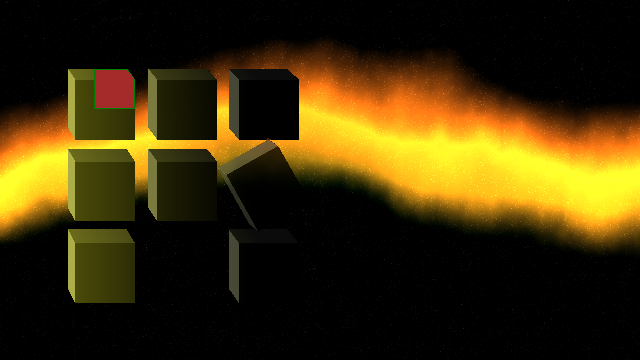

In [31]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REGION_TO_SEGMENTATION>'], fill_mask=True)

### Open vocabulary detection

open vocabulary detection can detect both objects and ocr texts.

results format:

{ '\<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[x1, y1, x2, y2], [x1, y1, x2, y2], ...]], 'bboxes_labels': ['label_1', 'label_2', ..],
'polygons': [[[x1, y1, x2, y2, ..., xn, yn], [x1, y1, ..., xn, yn]], ...], 'polygons_labels': ['label_1', 'label_2', ...]
}}

In [34]:
task_prompt = '<OPEN_VOCABULARY_DETECTION>'
results = run_example(task_prompt, text_input="fire")
print(results)

{'<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[1.5999999046325684, 42.30000305175781, 638.3999633789062, 251.10000610351562]], 'bboxes_labels': ['fire'], 'polygons': [], 'polygons_labels': []}}


In [35]:
def convert_to_od_format(data):
    """
    Converts a dictionary with 'bboxes' and 'bboxes_labels' into a dictionary with separate 'bboxes' and 'labels' keys.

    Parameters:
    - data: The input dictionary with 'bboxes', 'bboxes_labels', 'polygons', and 'polygons_labels' keys.

    Returns:
    - A dictionary with 'bboxes' and 'labels' keys formatted for object detection results.
    """
    # Extract bounding boxes and labels
    bboxes = data.get('bboxes', [])
    labels = data.get('bboxes_labels', [])

    # Construct the output format
    od_results = {
        'bboxes': bboxes,
        'labels': labels
    }

    return od_results

In [36]:
bbox_results  = convert_to_od_format(results['<OPEN_VOCABULARY_DETECTION>'])

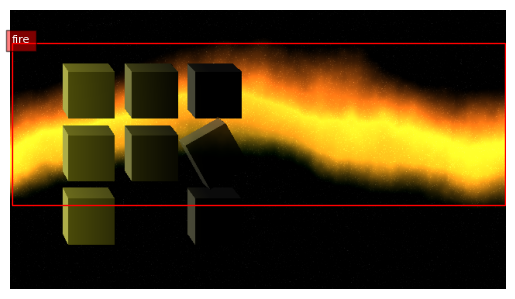

In [37]:
plot_bbox(image, bbox_results)

### region to texts

In [38]:
task_prompt = '<REGION_TO_CATEGORY>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

{'<REGION_TO_CATEGORY>': 'toy<loc_52><loc_332><loc_932><loc_774>'}


In [39]:
task_prompt = '<REGION_TO_DESCRIPTION>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

{'<REGION_TO_DESCRIPTION>': '3D rendering of yellow and black cubes on a black background<loc_52><loc_332><loc_932><loc_774>'}


## ocr related tasks

In [40]:
url = "http://ecx.images-amazon.com/images/I/51UUzBDAMsL.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')

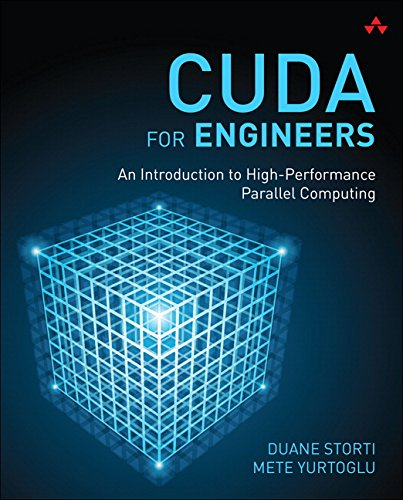

In [41]:
image

In [42]:
task_prompt = '<OCR>'
run_example(task_prompt)

{'<OCR>': 'CUDA\nFOR ENGINEERS\nAn Introduction to High-Performance\nParallel Computing\nDUANE STORTI\nMETE YURTOGLU\n'}

In [43]:
task_prompt = '<OCR_WITH_REGION>'
results = run_example(task_prompt)
print(results)
# ocr results format
# {'OCR_WITH_REGION': {'quad_boxes': [[x1, y1, x2, y2, x3, y3, x4, y4], ...], 'labels': ['text1', ...]}}

{'<OCR_WITH_REGION>': {'quad_boxes': [[167.44650268554688, 50.25, 374.9914855957031, 50.25, 374.9914855957031, 114.25, 167.44650268554688, 114.25], [144.8784942626953, 121.25, 374.9914855957031, 120.25, 374.9914855957031, 149.25, 144.8784942626953, 150.25], [115.4594955444336, 165.25, 375.7974853515625, 165.25, 375.7974853515625, 183.25, 115.4594955444336, 183.25], [239.9864959716797, 184.25, 375.7974853515625, 185.25, 375.7974853515625, 203.25, 239.9864959716797, 201.25], [265.77850341796875, 440.75, 375.7974853515625, 440.75, 375.7974853515625, 456.25, 265.77850341796875, 456.25], [250.86749267578125, 459.25, 375.7974853515625, 459.25, 375.7974853515625, 474.25, 250.86749267578125, 474.25]], 'labels': ['</s>CUDA', 'FOR ENGINEERS', 'An Introduction to High-Performance', 'Parallel Computing', 'DUANE STORTI', 'METE YURTOGLU']}}


In [44]:
def draw_ocr_bboxes(image, prediction, scale=1):
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)

    display(image)

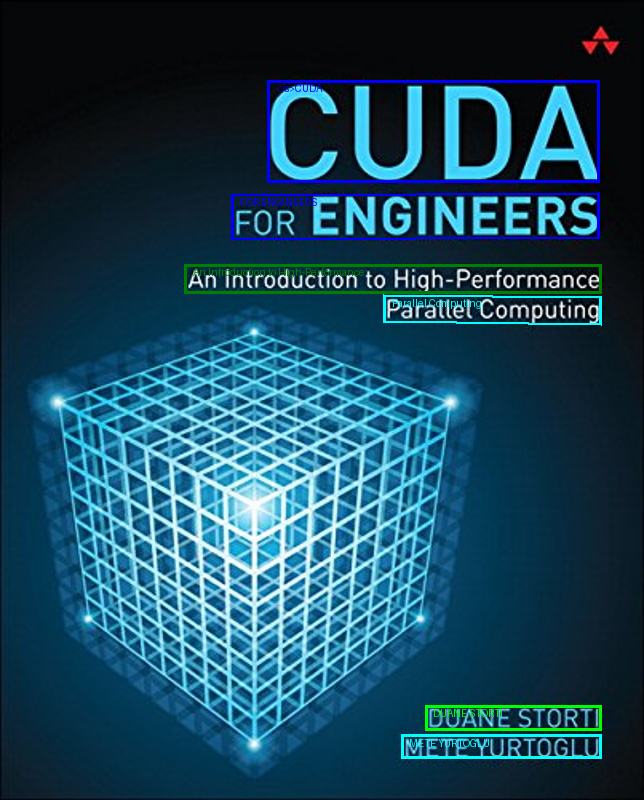

In [45]:
output_image = copy.deepcopy(image)
w, h = output_image.size
scale = 800 / max(w, h)
new_output_image = output_image.resize((int(w * scale), int(h * scale)))
draw_ocr_bboxes(new_output_image, results['<OCR_WITH_REGION>'], scale=scale)

## Cascaded tasks

### Caption + Phrase Grounding

results format:

{
 '\<CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [66]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

In [67]:
task_prompt = '<CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<CAPTION>'] = text_input

In [68]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[33.599998474121094,
    158.63999938964844,
    582.0800170898438,
    374.6399841308594],
   [1.5999999046325684,
    4.559999942779541,
    638.3999633789062,
    305.5199890136719]],
  'labels': ['a green volkswagen beetle', 'a yellow building']},
 '<CAPTION>': 'a green volkswagen beetle parked in front of a yellow building'}

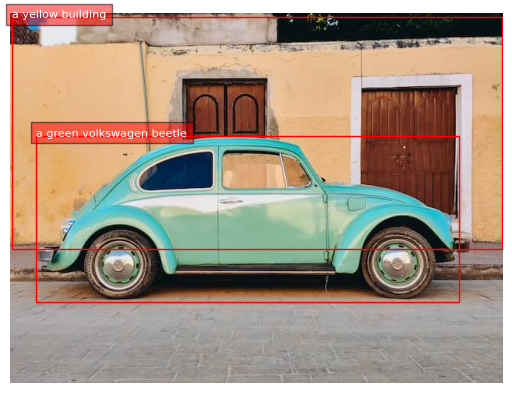

In [69]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### Detailed Caption + Phrase Grounding

results format:

{
 '\<DETAILED_CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [70]:
task_prompt = '<DETAILED_CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<DETAILED_CAPTION>'] = text_input

In [61]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[34.23999786376953,
    159.1199951171875,
    582.719970703125,
    375.1199951171875],
   [1.5999999046325684,
    4.559999942779541,
    638.3999633789062,
    305.5199890136719],
   [453.44000244140625,
    94.31999969482422,
    582.719970703125,
    265.67999267578125],
   [223.67999267578125,
    84.72000122070312,
    335.03997802734375,
    166.8000030517578],
   [344.0, 1.1999999284744263, 638.3999633789062, 40.55999755859375],
   [18.239999771118164,
    1.1999999284744263,
    638.3999633789062,
    43.91999816894531],
   [20.15999984741211,
    1.1999999284744263,
    104.63999938964844,
    45.36000061035156]],
  'labels': ['a green Volkswagen Beetle',
   'a yellow building',
   'brown doors',
   'brown doors',
   'trees',
   'a clear blue sky',
   'a clear blue sky']},
 '<DETAILED_CAPTION>': 'The image shows a green Volkswagen Beetle parked in front of a yellow building with two brown doors, surrounded by trees and a clear bl

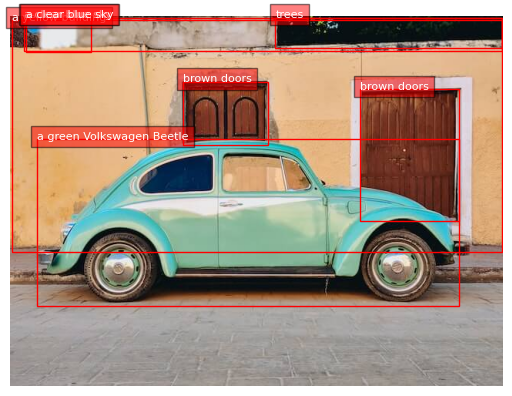

In [62]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### More Detailed Caption + Phrase Grounding

results format:

{
 '\<MORE_DETAILED_CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [63]:
task_prompt = '<MORE_DETAILED_CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<MORE_DETAILED_CAPTION>'] = text_input

In [64]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[36.15999984741211,
    158.16000366210938,
    580.1599731445312,
    372.7200012207031],
   [2.240000009536743,
    340.0799865722656,
    637.1199951171875,
    477.3599853515625],
   [454.0799865722656,
    93.83999633789062,
    580.7999877929688,
    262.32000732421875],
   [36.15999984741211,
    157.67999267578125,
    579.5199584960938,
    372.239990234375],
   [221.1199951171875,
    79.91999816894531,
    583.3599853515625,
    263.7599792480469],
   [454.0799865722656,
    93.83999633789062,
    581.4400024414062,
    262.32000732421875],
   [223.67999267578125,
    83.75999450683594,
    333.7599792480469,
    163.44000244140625],
   [2.879999876022339, 4.559999942779541, 636.47998046875, 300.239990234375],
   [19.520000457763672,
    0.7199999690055847,
    102.07999420166016,
    42.47999954223633],
   [345.91998291015625,
    0.7199999690055847,
    637.1199951171875,
    37.20000076293945]],
  'labels': ['a vintage Volkswa

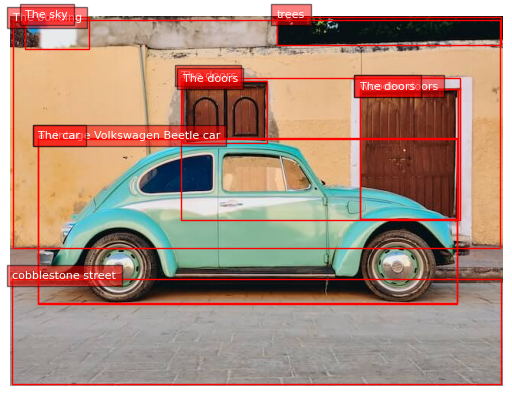

In [65]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])